In [278]:
! pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import shapely.geometry as geometry
import pandas as pd
import seaborn as sns

In [0]:
SiGunGu = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/EMD_201905.shp')

In [0]:
SiGunGu['EMD_CD']=SiGunGu['EMD_CD'].astype(int)
DongJack=SiGunGu[SiGunGu['EMD_CD'].isin([i for i in range(11590101,11590110)])]

In [237]:
DongJack.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
409,11590101,Noryangjin-dong,³ë·®Áøµ¿,"POLYGON ((951386.621 1946611.519, 951396.786 1..."
410,11590102,Sangdo-dong,»óµµµ¿,"MULTIPOLYGON (((951797.594 1945502.652, 951798..."
411,11590103,Sangdo 1(il)-dong,»óµµ1µ¿,"POLYGON ((951535.558 1945562.562, 951535.562 1..."
412,11590104,Bon-dong,º»µ¿,"POLYGON ((951414.806 1946601.185, 951415.040 1..."
413,11590105,Heukseok-dong,Èæ¼®µ¿,"POLYGON ((952444.058 1946115.502, 952445.444 1..."


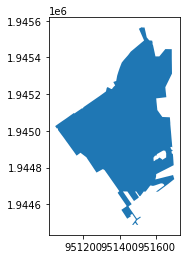

In [238]:
DongJack[DongJack['EMD_ENG_NM']=='Sangdo 1(il)-dong'].plot()

In [239]:
DongJack.drop(411,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
kk = {}
for idx in DongJack.index:
  if idx==410:
    for i in [0,1]:
      kk[DongJack.loc[idx,'EMD_ENG_NM']+'%s'%(i)]=[z for z in DongJack.loc[idx,'geometry'][i].exterior.coords]
  else:
    kk[DongJack.loc[idx,'EMD_ENG_NM']] = [z for z in DongJack.loc[idx,'geometry'].exterior.coords]

In [241]:
dj=pd.DataFrame(columns=['dong','where'])
for key in kk.keys():
  dj= pd.concat([a,pd.DataFrame({'dong':key,'where':kk[key]})])

dj.reset_index(inplace=True)
dj.drop('index',axis=1,inplace=True)
# 동 표준화
dj.loc[dj['dong']=='Sangdo-dong0','dong']= 'Sangdo-dong'
dj.loc[dj['dong']=='Sangdo-dong1','dong']= 'Sangdo-dong'
dj.loc[dj['dong']=='Sangdo 1(il)-dong','dong']= 'Sangdo-dong'

print(dj.shape)
print(dj['dong'].value_counts())
dj.head()

(5941, 2)
Sangdo-dong        2013
Sindaebang-dong    1212
Noryangjin-dong     598
Daebang-dong        526
Bon-dong            410
Sadang-dong         405
Dongjak-dong        393
Heukseok-dong       384
Name: dong, dtype: int64


,dong,where
0,Noryangjin-dong,"(951386.6214153571, 1946611.5191149474)"
1,Noryangjin-dong,"(951396.7858744995, 1946607.7786045154)"
2,Noryangjin-dong,"(951407.4791346185, 1946603.8483605643)"
3,Noryangjin-dong,"(951414.806342474, 1946601.1854954637)"
4,Noryangjin-dong,"(951380.6361696183, 1946552.009587505)"


좌표계: ITRF2000

http://www.juso.go.kr/addrlink/addressBuildDevNew.do?menu=bsin

In [0]:
dj['X'] = dj['where'].apply(lambda  x: x[0]).values
dj['Y'] = dj['where'].apply(lambda  x: x[1]).values

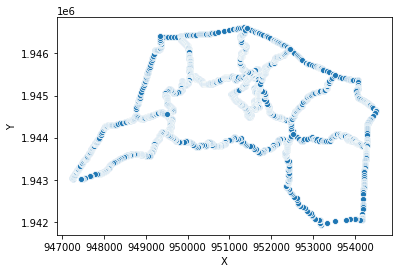

In [243]:
sns.scatterplot(dj['X'],dj['Y'])

안가 비워져 있는 상태이다. 이걸 어떻게 채워야 할까.
- 구별로 나눠진 데이터를 불러와 채우면 어떨까?

# 동작구 전체 폴리곤 데이터

In [0]:
Gu = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/SIG_201905.shp')

In [245]:
Dongjak=Gu[Gu['SIG_ENG_NM'].str.contains('Dongjak')]
Dongjak

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
19,11590,Dongjak-gu,µ¿ÀÛ±¸,"POLYGON ((951811.770 1946444.671, 951885.519 1..."


In [0]:
num=0
kk={}
for idx,row in Dongjak.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        kk[num] = pt
        num+=1

In [0]:
jak=pd.DataFrame(kk).T

Shapely 라이브러리를 이용해 빈 공간을 채워 넣어 보자.

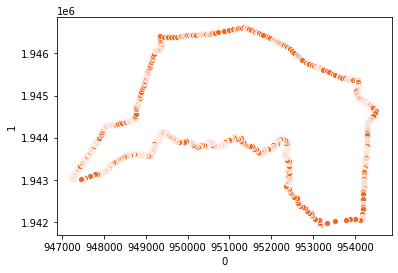

In [272]:
sns.scatterplot(jak[0],jak[1],color='#f16824')

In [0]:
for idx,row in Dongjak.iterrows():
  coords=list(row['geometry'].exterior.coords)

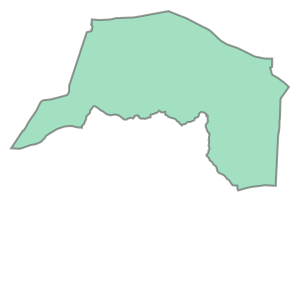

In [283]:
poly = Polygon(coords)
Polygon(coords)

In [290]:
p1=Point(951885,1946408) #경계선에 within을 하면 False를 반영함.
p1.within(poly)

True

사실상 끝난 것 같다. X좌표의 최저점과 최고점 그리고 Y좌표의 최저점과 최고점을 구해서 직사각형을 만든 뒤에 랜덤으로 점을 넣은 후에 poly안에 있는 것만 쏙 빼내면 될 것으로 보인다.

In [0]:
x_min=jak[0].min()
x_max=jak[0].max()
y_min=jak[1].min()
y_max=jak[1].max()
p1 = [x_min,y_min]
p2 = [x_min,y_max]
p3 = [x_max,y_min]
p4 = [x_max,y_max]

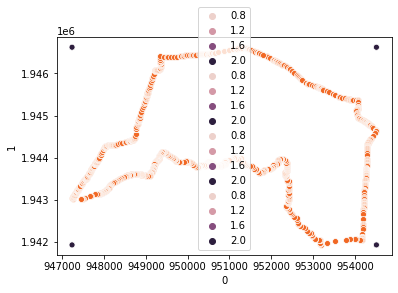

In [323]:
sns.scatterplot(p1[0],p1[1],p1)
sns.scatterplot(p2[0],p2[1],p2)
sns.scatterplot(p3[0],p3[1],p3)
sns.scatterplot(p4[0],p4[1],p4)
sns.scatterplot(jak[0],jak[1],color='#f16824')

In [0]:
x_np=np.random.uniform(x_min,x_max,100000)
y_np=np.random.uniform(y_min,y_max,100000)

In [0]:
df=pd.DataFrame({'x':x_np,
                 'y':y_np})

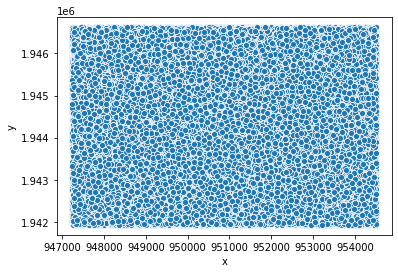

In [372]:
sns.scatterplot(df['x'],df['y'])

In [0]:
for idx in df.index:
  point=Point(df.loc[idx,'x'],df.loc[idx,'y'])
  if point.within(poly)==False:
    df.drop(idx,inplace=True)

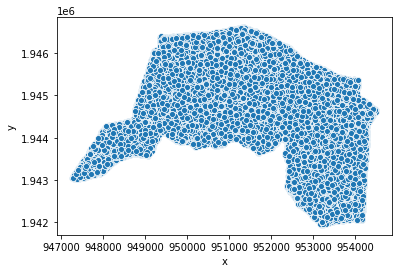

In [374]:
sns.scatterplot(df['x'],df['y'])

In [376]:
df.shape

(47766, 2)

In [0]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/동작구xy.csv')